In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [4]:
df = pd.read_excel('~/Downloads/crime.xls')
df = df[['R', 'EX0', 'LF']]

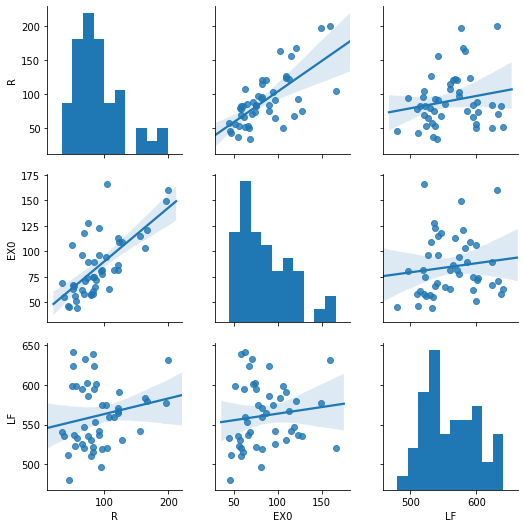

In [5]:
sns.pairplot(df, kind='reg')

з графіка особливої залежності не спостерігається

In [6]:
X = df[['EX0', 'LF']]
Y = df['R']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

/home/andrey/PycharmProjects/statlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     20.64
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           4.76e-07
Time:                        18:32:05   Log-Likelihood:                -222.43
No. Observations:                  47   AIC:                             450.9
Df Residuals:                      44   BIC:                             456.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.5345     58.517     -0.710      0.482    -159.467      76.398
EX0            0.8779      0.142      6.184      0.000       0.592       1.164
LF             0.1023      0.104      0.980      0.332      -0.108       0.313
==============================================================================
Omnibus:                        0.603   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.722
Skew:                          -0.221   Prob(JB):                        0.697
Kurtosis:                       2.584   Cond. No.                     8.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p=0.332 для змінної LF, оте спробуємо побудувати регрессію відносно лише EX0

In [10]:
X = df[['EX0']]
Y = df['R']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     40.36
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           9.34e-08
Time:                        18:35:54   Log-Likelihood:                -222.94
No. Observations:                  47   AIC:                             449.9
Df Residuals:                      45   BIC:                             453.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4464     12.669      1.140      0.260     -11.071      39.964
EX0            0.8948      0.141      6.353      0.000       0.611       1.179
==============================================================================
Omnibus:                        0.527   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.568
Skew:                          -0.233   Prob(JB):                        0.753
Kurtosis:                       2.729   Cond. No.                         275.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

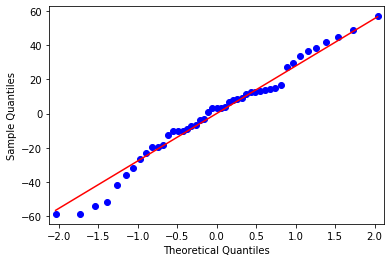

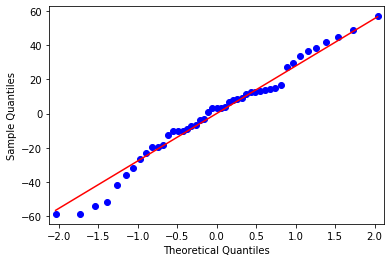

In [11]:
qqplot(results.resid, line='s')

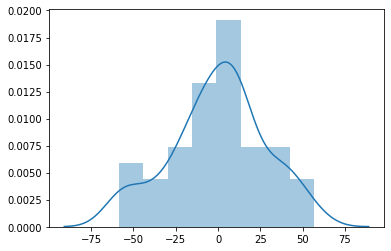

In [12]:
sns.distplot(results.resid)

залишки виглядають досить нормально

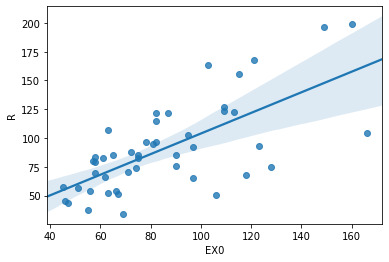

In [13]:
sns.regplot(df['EX0'], df['R'])

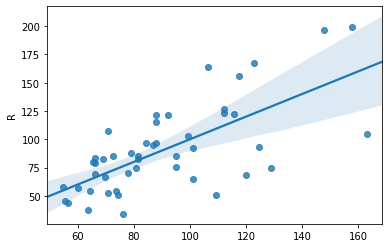

In [15]:
sns.regplot(results.fittedvalues, df['R'])

In [18]:
test = results.outlier_test()
outliers = test[test['bonf(p)'] < 0.05]
outliers

,student_resid,unadj_p,bonf(p)


викидів не спостерігається
отже загалом, можемо зробити висновок, що змінна R не залежить віж змінної LF, але має деяку залежність від змінної EX0